In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="UofT_project_1")

In [59]:
# Please remember to put the path to respective datasets
stock_data = pd.read_csv(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\project_data\sp500_stocks.csv")
companies_data = pd.read_csv(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\project_data\sp500_companies.csv")
inflation = pd.read_excel(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\project_data\inflation.xlsx")
unemployment = pd.read_excel(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\project_data\unemployment.xlsx")
mortgage = pd.read_csv(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\project_data\US_mortgages.csv")

- ## Data Cleaning

In [60]:
#Industiries data
industry_data = companies_data.drop(["Weight", "Longbusinesssummary", "Shortname", "Exchange"], axis=1).copy()

columns_for_convert = ["Currentprice", "Ebitda", "Revenuegrowth", "Fulltimeemployees"]

industry_data["Ebitda"] = industry_data["Ebitda"]/1000000
industry_data["Ebitda"] = industry_data["Ebitda"].apply(lambda x: f"{x:.2f}")

for i in columns_for_convert:
    industry_data[i] = pd.to_numeric(industry_data[i], errors="coerce")

industry_data.rename(columns={"Ebitda": "Ebitda (mil)"}, inplace=True)
industry_data.head()

,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda (mil),Revenuegrowth,City,State,Country,Fulltimeemployees
0,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,426.28,3167447941120,118427.0,0.176,Redmond,WA,United States,221000.0
1,AAPL,Apple Inc.,Technology,Consumer Electronics,169.67,2620027043840,130109.0,0.021,Cupertino,CA,United States,161000.0
2,NVDA,NVIDIA Corporation,Technology,Semiconductors,853.54,2133849931776,34480.0,2.653,Santa Clara,CA,United States,29600.0
3,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,158.14,1958832766976,100172.0,0.135,Mountain View,CA,United States,182502.0
4,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,156.60,1953130872832,100172.0,0.135,Mountain View,CA,United States,182502.0


In [62]:
#Companies data
real_st = industry_data[industry_data["Sector"] == "Real Estate"].copy()
reals_st_symbols = real_st["Symbol"].unique()
real_st.head()

,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda (mil),Revenuegrowth,City,State,Country,Fulltimeemployees
82,PLD,"Prologis, Inc.",Real Estate,REIT - Industrial,126.26,116796563456,5876.60,0.087,San Francisco,CA,United States,2574.0
105,AMT,American Tower Corporation,Real Estate,REIT - Specialty,192.81,89917325312,6897.00,0.030,Boston,MA,United States,5643.0
122,EQIX,"Equinix, Inc.",Real Estate,REIT - Specialty,801.24,75814453248,2865.91,0.154,Redwood City,CA,United States,13151.0
159,SPG,"Simon Property Group, Inc.",Real Estate,REIT - Retail,150.19,56263876608,4106.49,0.091,Indianapolis,IN,United States,2500.0
174,WELL,Welltower Inc.,Real Estate,REIT - Healthcare Facilities,92.00,52336779264,2564.66,0.199,Toledo,OH,United States,533.0


In [63]:
#Stock Data
stock_data_dropped = stock_data.drop("Adj Close", axis=1)
stock_data_rlst = stock_data_dropped[stock_data_dropped["Symbol"].isin(reals_st_symbols)].copy()
stock_data_rlst["Date"] = pd.to_datetime(stock_data_rlst["Date"])
stock_rlst_2020 = stock_data_rlst[stock_data_rlst["Date"].dt.year == 2020].copy()
stock_rlst_2020.head()

,Date,Symbol,Close,High,Low,Open,Volume
52776,2020-01-02,ARE,159.729996,162.419998,158.520004,161.929993,1094900.0
52777,2020-01-03,ARE,160.639999,161.360001,158.500000,158.500000,371300.0
52778,2020-01-06,ARE,161.029999,161.580002,159.589996,160.039993,604700.0
52779,2020-01-07,ARE,155.759995,157.529999,154.699997,156.490005,4543900.0
52780,2020-01-08,ARE,157.830002,158.000000,155.779999,156.500000,2239300.0


In [64]:
#Avereging Stock Data
stock_rlst_2020_exp = stock_rlst_2020.copy()
stock_rlst_2020_exp["Date"] = stock_rlst_2020_exp["Date"].dt.strftime("%b")
stock_m_mean = stock_rlst_2020_exp.groupby(['Symbol', 'Date'], as_index=False).mean()
stock_m_mean = stock_m_mean.round(2)
month_order= {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
stock_m_mean['Order'] = stock_m_mean['Date'].map(month_order)

final_stock = stock_m_mean.sort_values(by=['Symbol', 'Order']).drop(columns=["Order"])

final_stock

,Symbol,Date,Close,High,Low,Open,Volume
4,AMT,Jan,232.61,234.25,230.90,232.44,1490361.90
3,AMT,Feb,244.26,247.06,241.70,244.30,2105152.63
7,AMT,Mar,222.87,230.62,213.32,220.18,3515518.18
0,AMT,Apr,242.19,246.92,236.87,242.07,2490004.76
8,AMT,May,238.06,241.06,234.24,237.92,1975800.00
...,...,...,...,...,...,...,...
361,WY,Aug,28.95,29.23,28.61,28.87,4635119.05
371,WY,Sep,28.46,28.93,28.06,28.57,4631004.76
370,WY,Oct,29.10,29.54,28.67,29.14,3832063.64
369,WY,Nov,28.68,29.12,28.30,28.79,3911975.00


In [65]:
# Inflation
inflation_2020 = inflation[inflation["Year"] == 2020]
inflation_trnsp = inflation_2020.transpose()
inflation_trnsp.reset_index(inplace=True)
inflation_trnsp.columns = ['Date', 'Inflation Rate']
inflation_trnsp = inflation_trnsp[1:]
inflation_trnsp = inflation_trnsp.iloc[:-2]

In [66]:
# Mortgage 
mortgage['DATE'] = pd.to_datetime(mortgage['DATE'])
mortgage_2020= mortgage[mortgage['DATE'].dt.year == 2020]
mortgage_2020.set_index('DATE', inplace=True)
mortgage_monthly_avg = mortgage_2020.resample('M').mean()
mortgage_monthly_avg.reset_index(inplace=True)
mortgage_monthly_avg = mortgage_monthly_avg.rename(columns={"DATE": "Date", "MORTGAGE5US": "Avg Mortgage Rate"})
mortgage_monthly_avg["Date"] = mortgage_monthly_avg["Date"].dt.strftime("%b")
mortgage_monthly_avg['Avg Mortgage Rate'] = mortgage_monthly_avg['Avg Mortgage Rate'].round(1)

In [67]:
# Unemployment
unemployment_2020 = unemployment[unemployment["Year"] == 2020]
unemplotment_trnsp = unemployment_2020.transpose()
unemplotment_trnsp.reset_index(inplace=True)
unemplotment_trnsp.columns = ['Date', 'Unemployment Rate']
unemplotment_trnsp = unemplotment_trnsp[1:]

In [68]:
# Mergging 
inf_mrt_merge = pd.merge(inflation_trnsp, mortgage_monthly_avg, on="Date", how="inner")
clean_rates = pd.merge(inf_mrt_merge, unemplotment_trnsp, on="Date", how="inner")
clean_rates

,Date,Inflation Rate,Avg Mortgage Rate,Unemployment Rate
0,Jan,2.3,3.3,3.6
1,Feb,2.4,3.3,3.5
2,Mar,2.1,3.2,4.4
3,Apr,1.4,3.3,14.8
4,May,1.2,3.2,13.2
5,Jun,1.2,3.1,11.0
6,Jul,1.6,3.0,10.2
7,Aug,1.7,2.9,8.4
8,Sep,1.7,3.0,7.8
9,Oct,1.6,2.9,6.8


## Data Viz

In [69]:
realst_geo_map = real_st[["Longname", "Ebitda (mil)", "City", "State"]]

In [70]:
lat = []
lng = []

for index, i in realst_geo_map.iterrows():
    try:
        location = geolocator.geocode(f"{i['City']}, {i['State']}")
        lat.append(location.latitude)
        lng.append(location.longitude)
    except AttributeError:
        lat.append(None)
        lng.append(None)


realst_geo_map["Latitude"] = lat
realst_geo_map["Longitude"] = lng

C:\Users\ulyan\AppData\Local\Temp\ipykernel_9480\3722119639.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realst_geo_map["Latitude"] = lat
C:\Users\ulyan\AppData\Local\Temp\ipykernel_9480\3722119639.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realst_geo_map["Longitude"] = lng


In [72]:
%%capture --no-display

# Configure the map plot
map_plot = realst_geo_map.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    size = "Ebitda (mil)",
    scale = 0.5,
    color = "Longname",
    alpha=0.5
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Longname,Ebitda (mil))

In [106]:
# Monthly rate of return for real estate 

# Filter for January's opening prices
jan_open = final_stock[final_stock["Date"] == "Jan"][["Symbol", "Open"]].set_index("Symbol")

# Filter for December's closing prices
dec_close = final_stock[final_stock["Date"] == "Dec"][["Symbol", "Close"]].set_index("Symbol")

# Calculate the rate of return
ror = ((jan_open["Open"] - dec_close["Close"]) / dec_close["Close"])*100

# Create a new DataFrame for rate of returns
ror_data = pd.DataFrame(ror, columns=['Rate of Return'])
ror_data.reset_index(inplace=True)

# Show the results
ror_data

,Symbol,Rate of Return
0,AMT,4.646137
1,ARE,-6.694367
2,AVB,30.618253
3,BXP,40.933591
4,CBRE,-5.195008
5,CCI,-8.285931
6,CPT,9.981722
7,CSGP,-27.729012
8,DLR,-8.260027
9,DOC,19.178082


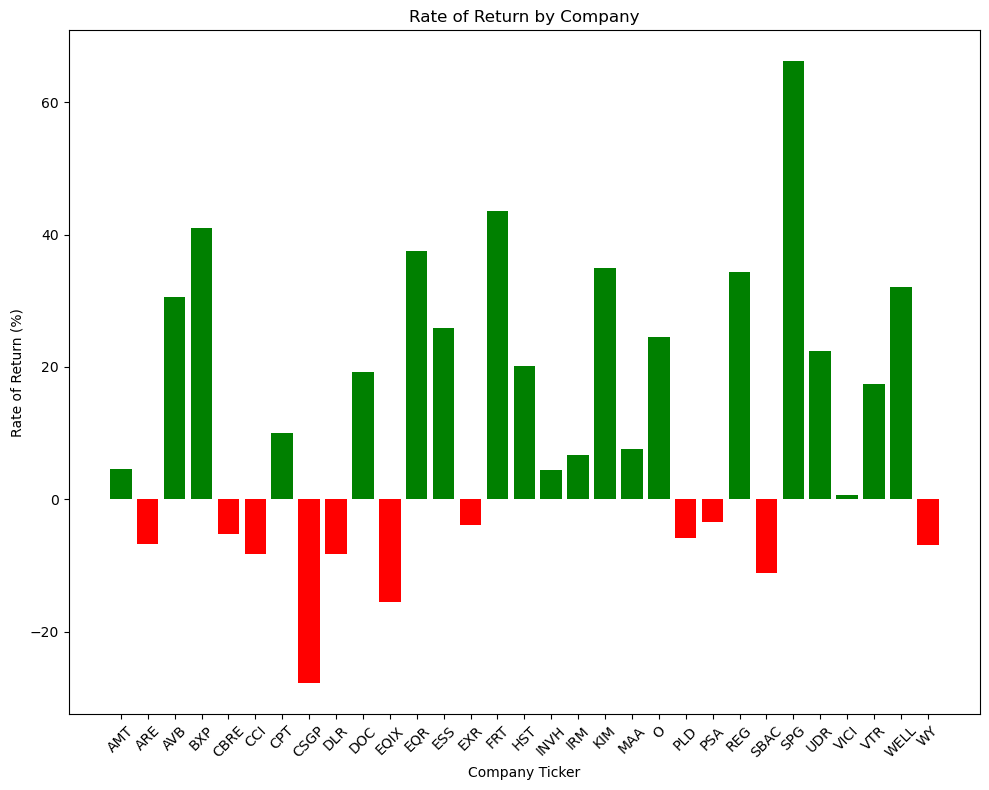

In [105]:
# Assign colors to negative and positive rate of returns
colors = ["green" if x >= 0 else "red" for x in ror_data['Rate of Return']]

# Create an area for the graph
plt.figure(figsize=(10, 8))

# Plot the bar graph and assign the lables 
plt.bar(ror_data['Symbol'], ror_data['Rate of Return'], color=colors)
plt.xlabel('Company Ticker')
plt.ylabel('Rate of Return (%)')
plt.title('Rate of Return by Company') 
plt.xticks(rotation=45)

# Accurately display the graph
plt.tight_layout() 

# Show the graph
plt.show()